/Users/antonlenander/anaconda3/envs/phantom/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-04 13:16:26,450	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-04 13:16:26,806	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-04 13:16:27,353	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


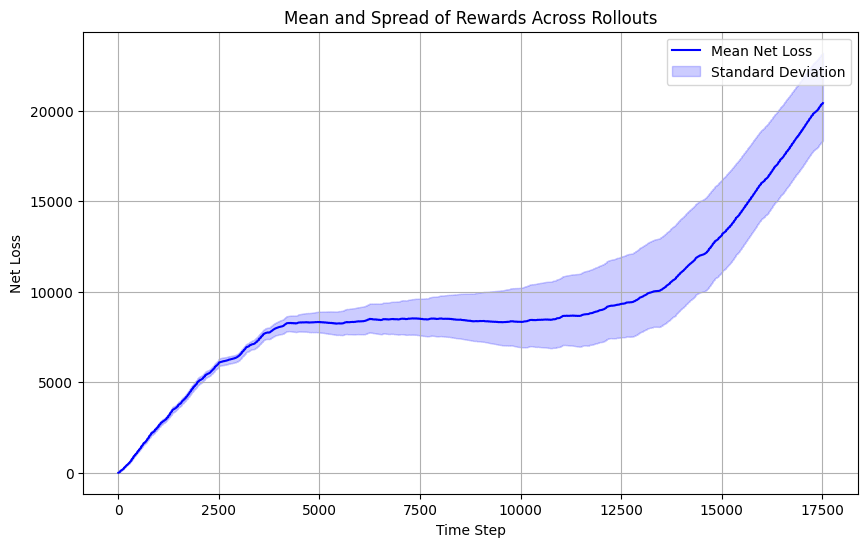

In [ ]:
import cloudpickle
import os
import json
import numpy as np
import matplotlib.pyplot as plt

path = "output/multi/"
results_path = os.path.join(path, "results_multi.pkl")

new_metrics = {}
messages = []

# Load the results
with open(results_path, "rb") as file:
    results = cloudpickle.load(file)

#Extract rewards from all rollouts (adjust "reward" key if needed)
all_netloss = np.array([rollout.metrics[f"env/total_loss"] for rollout in results])  # Shape: (num_rollouts, num_steps)

mean_netloss = np.mean(all_netloss, axis=0)  # Mean across rollouts for each time step
min_netloss = np.min(all_netloss, axis=0)
max_netloss = np.max(all_netloss, axis=0)

time_steps = np.arange(all_netloss.shape[1])  # Assuming all rollouts have the same number of steps

plt.figure(figsize=(10, 6))
plt.plot(time_steps, mean_netloss, label="Mean Net Loss", color="blue")
plt.fill_between(
    time_steps,
    min_netloss,
    max_netloss,  # Upper bound
    color="blue",
    alpha=0.2,  # Transparency for the shaded area
    label="Standard Deviation"
)

plt.xlabel("Time Step")
plt.ylabel("Net Loss")
plt.title("Mean and Spread of Rewards Across Rollouts")
plt.legend()
plt.grid()
plt.show()


Highest Gradient for greed 0.25: -3.33849999999984
Highest Gradient for greed 0.5: -3.741500000000997
Highest Gradient for greed 0.75: -3.543000000000575


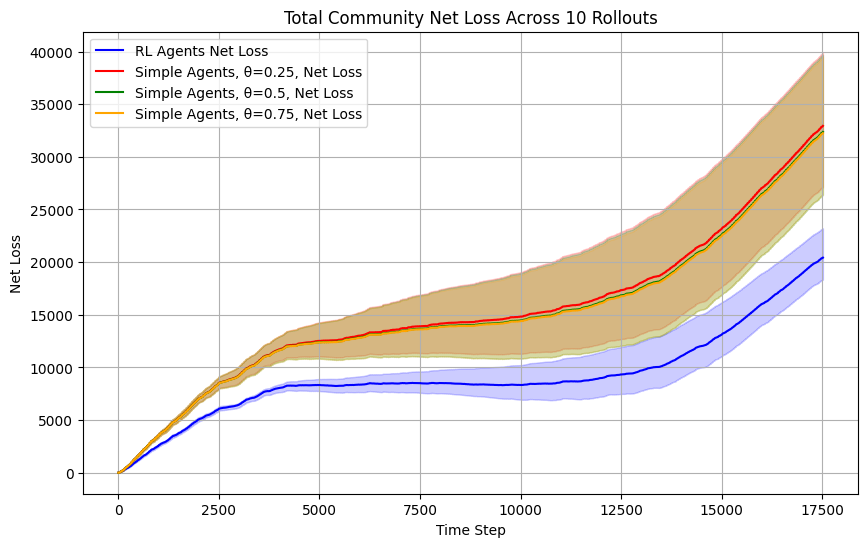

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_steps, mean_netloss, label="RL Agents Net Loss", color="blue")
plt.fill_between(
    time_steps,
    min_netloss,
    max_netloss,  # Upper bound
    color="blue",
    alpha=0.2,  # Transparency for the shaded area
)

jsonpaths = ["output/multi/log_025greed.json", 
            "output/multi/log_05greed.json", 
            "output/multi/log_075greed.json"]
greeds = [0.25, 0.5, 0.75]
colors = ["red", "green", "orange"]

for path, greed, color in zip(jsonpaths, greeds, colors):
    log_data = []
    with open(path, 'r') as file:
        for line in file:
            log_data.append(json.loads(line))

    all_netloss_simple = []

    for episode in log_data:
        net_loss = []
        for step in episode.get('steps'):
            metrics = step.get('metrics')
            if isinstance(metrics, dict):
                net_loss.append(metrics.get(f"env/total_loss", None))
        all_netloss_simple.append(net_loss)

    mean_netloss_simple = np.mean(all_netloss_simple, axis=0)  # Mean across rollouts for each time step
    highest_gradient = np.min(np.gradient(mean_netloss_simple))
    print(f"Highest Gradient for greed {greed}: {highest_gradient}")
    min_netloss_simple = np.min(all_netloss_simple, axis=0)
    max_netloss_simple = np.max(all_netloss_simple, axis=0)
    plt.plot(time_steps, mean_netloss_simple, label=f"Simple Agents, \u03B8={greed}, Net Loss", color=color)
    plt.fill_between(
    time_steps,
    min_netloss_simple,
    max_netloss_simple,  # Upper bound,
    alpha=0.2,
    color=color  # Transparency for the shaded area
)

plt.xlabel("Time Step")
plt.ylabel("Net Loss")
plt.title("Total Community Net Loss Across 10 Rollouts")
plt.legend()
plt.grid()
plt.show()


